# A scrutiny of the effectiveness of various variations of Convolutional Neural Networks.

Found 931 images belonging to 16 classes.
59/59 [==============================] - 3s 39ms/step
Confusion matrix for RapidNet:
[[ 8  6  5  1  8  1  5  4  3  2  3  2  0  6  8  4]
 [ 9 29 10  4 11  2  6  7 10  9 18  7 10  1  7  5]
 [ 2 12  3  2  2  1  2  9  3  4  6  6  3  2  3  2]
 [ 3 12  4  0  1  2  4  5  2  2  1  2  8  2  2  0]
 [ 4  9  6  1  3  2  2  3  3  6  6  3  8  1  0  3]
 [ 2  1  3  0  1  0  1  0  3  0  3  1  3  1  2  1]
 [ 5 10  3  3  2  1  2  1  2  0  9  2  3  2  3  3]
 [ 2  8  3  1  4  1  2  3  5  2  6  1  5  3  1  4]
 [ 6  5  3  2  1  1  4  2  2  4  7  1  4  1  5  3]
 [ 2  8  3  0  1  0  2  4  6  4  2  3  1  1  1  4]
 [ 8 13  5  7  9  2  2  4  4  3  7  6  3  7  2  3]
 [ 2  5  3  1  4  1  3  4  4  2  2  2  0  5  3  4]
 [ 0  8  3  5  3  2  1  5  1  2  3  4  1  5  5  3]
 [ 4  6  7  2  7  1  5  0  3  1  6  3  2  5  1  0]
 [ 6  9  2  0  4  3  4  4  1  1  6  3  2  4  3  3]
 [ 2  9  0  1  3  0  2  4  0  4  1  2  2  9  3  0]]
Classification report for RapidNet:
              precis

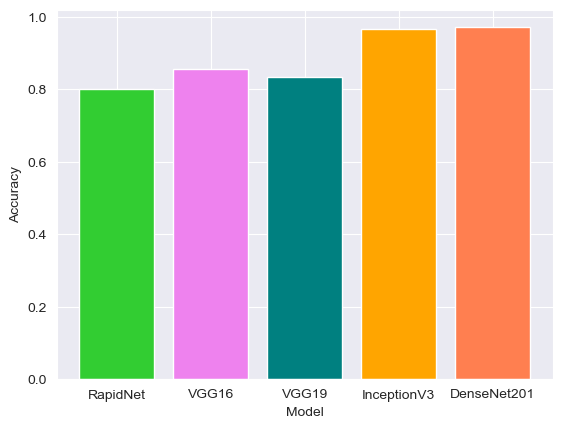

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Define a list of h5 files that contain the saved models
models_dir = 'models/'
model_names = ['RapidNet', 'VGG16', 'VGG19', 'InceptionV3', 'DenseNet201']
model_files = ['RapidNet.h5', 'VGG16.h5', 'VGG19.h5', 'InceptionV3.h5', 'DenseNet201.h5']
batch_sizes = [16, 32, 32, 16, 16]

# Load each model from its corresponding h5 file
models = []
for file in model_files:
    model = load_model(models_dir + file)
    models.append(model)

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = "image_dataset/test"  # Update with the path to your test data directory


# Evaluate each model on the test data and record the accuracy
accuracies = []
for i, model in enumerate(models):
    test_data = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=batch_sizes[i],
        class_mode="categorical"
    )
    loss, accuracy = model.evaluate(test_data)
    accuracies.append(accuracy)

    # Create a confusion matrix for each model
    y_pred = model.predict(test_data)
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(test_data.classes, y_pred_classes)
    print(f"Confusion matrix for {model_names[i]}:")
    print(cm)

    # Create a classification report for each model
    target_names = list(test_data.class_indices.keys())
    print(f"Classification report for {model_names[i]}:")
    print(classification_report(test_data.classes, y_pred_classes, target_names=target_names))

# Plot the accuracy of each model using a bar plot
fig, ax = plt.subplots()
ax.bar(range(len(accuracies)), accuracies, color=['limegreen', 'violet', "teal", 'orange', 'coral'])
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_xticks(range(len(accuracies)))
ax.set_xticklabels([model_names[i] for i in range(len(accuracies))])
plt.show()
